Problem statement

Predict probability a web user by the websites they visit

Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Retrieve files used in competition

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/sample_submission.csv
/kaggle/input/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/train.zip
/kaggle/input/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/train_sessions.csv
/kaggle/input/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/site_dic.pkl
/kaggle/input/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/test_sessions.csv


Use pandas to read csv files

In [3]:
train = pd.read_csv("/kaggle/input/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/train_sessions.csv")
test = pd.read_csv("/kaggle/input/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/test_sessions.csv")
submission = pd.read_csv("/kaggle/input/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/sample_submission.csv")


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,3846.0,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,39.0,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,782.0,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,178.0,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,253557,3474,2013-11-25 10:26:54,3474.0,2013-11-25 10:26:58,141.0,2013-11-25 10:27:03,2428.0,2013-11-25 10:27:04,106.0,2013-11-25 10:27:13,2428.0,2013-11-25 10:27:16,2428.0,2013-11-25 10:27:28,2428.0,2013-11-25 10:27:40,2428.0,2013-11-25 10:27:52,148.0,2013-11-25 10:27:53,0
253557,253558,12727,2013-03-12 16:01:15,12727.0,2013-03-12 16:01:16,2215.0,2013-03-12 16:01:16,38.0,2013-03-12 16:01:17,2215.0,2013-03-12 16:01:17,23.0,2013-03-12 16:01:17,25444.0,2013-03-12 16:01:18,2215.0,2013-03-12 16:01:18,23.0,2013-03-12 16:01:18,21.0,2013-03-12 16:01:18,0
253558,253559,2661,2013-09-12 14:05:03,15004.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:06:29,5562.0,2013-09-12 14:06:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
253559,253560,812,2013-12-19 15:20:22,676.0,2013-12-19 15:20:22,814.0,2013-12-19 15:20:22,22.0,2013-12-19 15:20:22,39.0,2013-12-19 15:20:22,812.0,2013-12-19 15:20:23,814.0,2013-12-19 15:20:23,570.0,2013-12-19 15:20:23,22.0,2013-12-19 15:20:24,570.0,2013-12-19 15:20:24,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int64  
 2   time1       253561 non-null  object 
 3   site2       250098 non-null  float64
 4   time2       250098 non-null  object 
 5   site3       246919 non-null  float64
 6   time3       246919 non-null  object 
 7   site4       244321 non-null  float64
 8   time4       244321 non-null  object 
 9   site5       241829 non-null  float64
 10  time5       241829 non-null  object 
 11  site6       239495 non-null  float64
 12  time6       239495 non-null  object 
 13  site7       237297 non-null  float64
 14  time7       237297 non-null  object 
 15  site8       235224 non-null  float64
 16  time8       235224 non-null  object 
 17  site9       233084 non-null  float64
 18  time9       233084 non-null  object 
 19  si

In [7]:
train.isna().sum()

session_id        0
site1             0
time1             0
site2          3463
time2          3463
site3          6642
time3          6642
site4          9240
time4          9240
site5         11732
time5         11732
site6         14066
time6         14066
site7         16264
time7         16264
site8         18337
time8         18337
site9         20477
time9         20477
site10        22509
time10        22509
target            0
dtype: int64

In [8]:
test

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
0,1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
1,2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
2,3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
3,4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,2014-11-04 10:03:21,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
4,5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,2014-05-16 15:05:40,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82792,82793,812,2014-10-02 18:20:09,1039.0,2014-10-02 18:20:09,676.0,2014-10-02 18:20:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82793,82794,300,2014-05-26 14:16:40,302.0,2014-05-26 14:16:41,302.0,2014-05-26 14:16:44,300.0,2014-05-26 14:16:44,300.0,2014-05-26 14:17:19,1222.0,2014-05-26 14:17:19,302.0,2014-05-26 14:17:19,1218.0,2014-05-26 14:17:19,1221.0,2014-05-26 14:17:19,1216.0,2014-05-26 14:17:19
82794,82795,29,2014-05-02 11:21:56,33.0,2014-05-02 11:21:56,35.0,2014-05-02 11:21:56,22.0,2014-05-02 11:22:03,37.0,2014-05-02 11:22:03,6779.0,2014-05-02 11:22:03,30.0,2014-05-02 11:22:03,21.0,2014-05-02 11:22:04,23.0,2014-05-02 11:22:04,6780.0,2014-05-02 11:22:04
82795,82796,5828,2014-05-03 10:05:25,23.0,2014-05-03 10:05:27,21.0,2014-05-03 10:05:27,804.0,2014-05-03 10:05:27,21.0,2014-05-03 10:05:36,3350.0,2014-05-03 10:05:37,23.0,2014-05-03 10:05:37,894.0,2014-05-03 10:05:38,21.0,2014-05-03 10:05:38,961.0,2014-05-03 10:05:38


In [9]:
submission

,session_id,target
0,1,0.948255
1,2,0.682483
2,3,0.502855
3,4,0.345556
4,5,0.889428
...,...,...
82792,82793,0.585216
82793,82794,0.621074
82794,82795,0.651144
82795,82796,0.319917


Analyse target

In [10]:
target = train["target"]
target.value_counts()

target
0    251264
1      2297
Name: count, dtype: int64

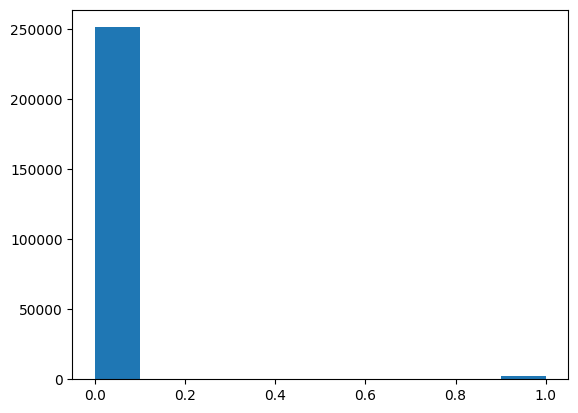

In [11]:
plt.hist(target)
plt.show()

Make dataframes numeric

In [12]:
drop_col = []

for col in train:
    if train[col].dtype =='object':
        drop_col.append(col)

print(drop_col)

train_num = train.drop(drop_col, axis=1)
test_num = test.drop(drop_col, axis=1)

train_num.shape, test_num.shape

['time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10']


((253561, 12), (82797, 11))

In [13]:
train_num.dropna(inplace=True)
train_num.isna().sum()

session_id    0
site1         0
site2         0
site3         0
site4         0
site5         0
site6         0
site7         0
site8         0
site9         0
site10        0
target        0
dtype: int64

In [14]:
test_num.isna().sum()

session_id       0
site1            0
site2         1489
site3         2722
site4         3615
site5         4456
site6         5231
site7         5957
site8         6646
site9         7313
site10        7991
dtype: int64

Drop Id

In [15]:
train_num.drop('session_id', axis=1, inplace=True)
test_num.drop('session_id', axis=1, inplace=True)

Impute null values

In [16]:
for col in test_num:
    test_num[col] = test_num[col].fillna(-1)

test_num.isna().sum().sum()

0

Heatmap

<Axes: >

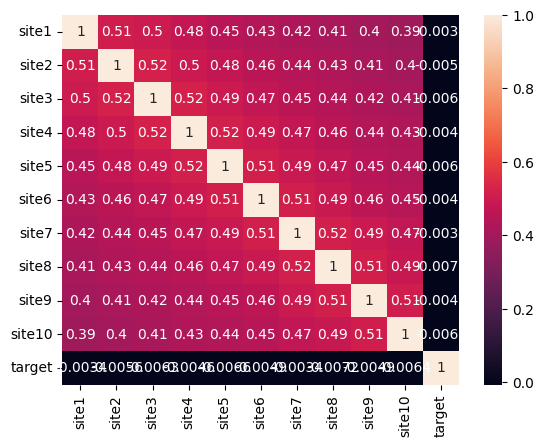

In [17]:
corr = train_num.corr()
sns.heatmap(corr, annot=True)

Define dependent and independent variables

In [18]:
y = train_num.pop('target')
X = train_num
X_test = test_num

Split X into training and validating sets

In [19]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.1, shuffle=True, random_state=42)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((207946, 10), (207946,), (23106, 10), (23106,), (82797, 10))

Define model

In [20]:
model = ExtraTreesClassifier(n_estimators=1000, max_depth=5, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6510536389254903

In [21]:
y_pred = model.predict(X_val)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [22]:
acc = accuracy_score(y_val, y_pred)
acc

0.6511295767333161

In [23]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[14893,  8001],
       [   60,   152]])

Predict on X_test

In [24]:
pred_proba = model.predict_proba(X_test)
pred = pred_proba[:,1]
pred

array([0.37940532, 0.47562862, 0.51351966, ..., 0.51144456, 0.49825958,
       0.48236578])

Prepare submission

In [25]:
submission['target'] = pred
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

,session_id,target
0,1,0.379405
1,2,0.475629
2,3,0.513520
3,4,0.502204
4,5,0.515026
...,...,...
82792,82793,0.503972
82793,82794,0.490629
82794,82795,0.511445
82795,82796,0.498260
